In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Step 1: Load Dataset
# Example dataset from Kaggle (CarDekho/Used Cars dataset)
# Replace with your dataset CSV file path
df = pd.read_csv("CarPrice_Assignment.csv")

print("Dataset shape:", df.shape)
print("1st rows: ",df.head())
print("columns: ",df.columns)


Dataset shape: (205, 26)
1st rows:     car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compression

In [4]:
# Step 2 (Updated): Encode categorical features
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=["object"]).columns

# Store one encoder per categorical column
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le   # save encoder for later use
# Now df_encoded has only numbers
print(df_encoded.head())


   car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130           5   
1           2               0       88.6  ...         130           5   
2           2               0       94.5  ...         152           5   
3           1               0       99.8  ...         109           5   
4           0               0       99.4  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68            

In [5]:
# Step 3: Feature & Target
# Assume 'Selling_Price' is the target column
X = df.drop(['price', 'car_ID'], axis=1)
y = df['price']

# convert categorical columns into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Step 4: Train Models

# Linear Regression
#lr_model = LinearRegression()
#lr_model.fit(X_train, y_train)

# Decision Tree
#dt_model = DecisionTreeRegressor(random_state=42)
#dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# Step 5: Model Evaluation Function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

# Evaluate all models
#evaluate_model("Linear Regression", lr_model, X_test, y_test)
#evaluate_model("Decision Tree", dt_model, X_test, y_test)
evaluate_model("Random Forest", rf_model, X_test, y_test)


--- Random Forest ---
R2 Score: 0.9552872567981128
MAE: 1338.023243902439
RMSE: 1878.777190865527



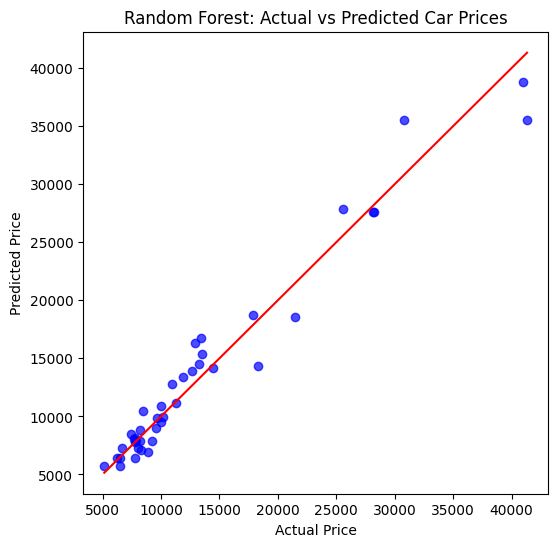

In [9]:
#Step 6: Visualisation
# Random Forest predictions vs actual (best visualization usually)
y_pred = rf_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")  # 45-degree line
plt.show()


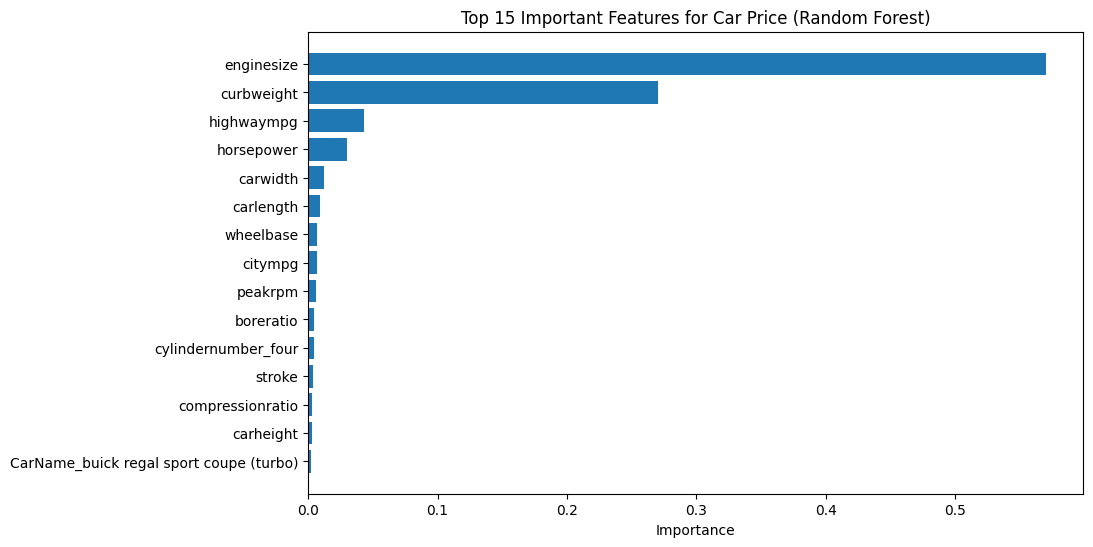

In [10]:
#Step 7: Feature importance
import pandas as pd
import matplotlib.pyplot as plt

# Random Forest Feature Importance
importances = rf_model.feature_importances_
feat_names = X.columns

feat_imp = pd.DataFrame({"Feature": feat_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"][:15], feat_imp["Importance"][:15])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 15 Important Features for Car Price (Random Forest)")
plt.show()


In [12]:
# Step 8: Predict for New Data
new_car = pd.DataFrame([{
    "CarName": "toyota corolla",
    "fueltype": "gas",
    "aspiration": "std",
    "doornumber": "four",
    "carbody": "sedan",
    "drivewheel": "fwd",
    "enginelocation": "front",
    "wheelbase": 97.0,
    "carlength": 174.0,
    "carwidth": 65.0,
    "carheight": 54.0,
    "curbweight": 2500,
    "enginetype": "ohc",
    "cylindernumber": "four",
    "enginesize": 130,
    "fuelsystem": "mpfi",
    "boreratio": 3.2,
    "stroke": 3.4,
    "compressionratio": 9.0,
    "horsepower": 110,
    "peakrpm": 5000,
    "citympg": 27,
    "highwaympg": 32
}])

# One-hot encode using the same approach as training
new_car_encoded = pd.get_dummies(new_car, drop_first=True)

# Align columns with training data (X_train)
new_car_encoded = new_car_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predictions
#print("Predicted Price (Linear Regression):", lr_model.predict(new_car_encoded)[0])
#print("Predicted Price (Decision Tree):", dt_model.predict(new_car_encoded)[0])
print("Predicted Price (Random Forest):", rf_model.predict(new_car_encoded)[0])

Predicted Price (Random Forest): 10605.225


In [13]:
import pickle
import os

os.makedirs("models", exist_ok=True)

# Save models
pickle.dump(rf_model, open("models/rf_model.pkl", "wb"))
#pickle.dump(dt_model, open("models/dt_model.pkl", "wb"))
#pickle.dump(lr_model, open("models/lr_model.pkl", "wb"))

# Save feature columns

pickle.dump(X_train.columns, open("models/feature_columns.pkl", "wb"))

print("Models and feature columns saved successfully!")


Models and feature columns saved successfully!
